In [4]:
from numberplate_extractor.plate_extractor import PlateExtractor
from numberplate_extractor.processing_pipeline import ProcessingPipeline
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
plate_extractor = PlateExtractor()
processing_pipeline = ProcessingPipeline()

/Users/elliottcooper/Desktop/Numberplate-Recognition-Neural-Network/venv/lib/python3.11/site-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
/Users/elliottcooper/Desktop/Numberplate-Recognition-Neural-Network/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


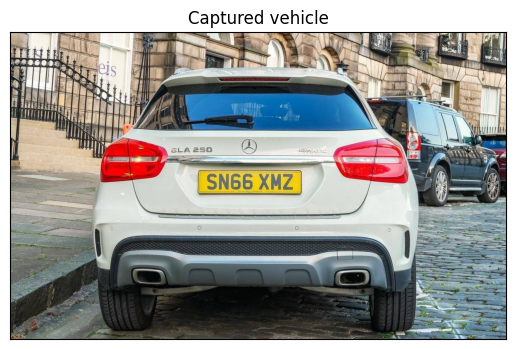

In [6]:
# Read image in
image = Image.open('real_test.png')

plt.imshow(image)
plt.title("Captured vehicle")
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# Get bounding box coordinates of plate
numberplate_prediction = plate_extractor.make_prediction(image)
xmin, ymin, xmax, ymax = plate_extractor.get_bounding_box(numberplate_prediction)

`post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection` instead, with `threshold=0.` for equivalent results.


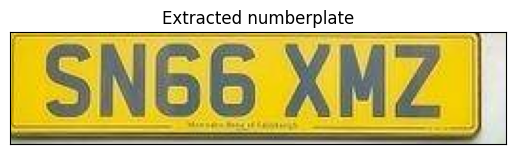

In [8]:
# Crop the numberplate from the original image
numberplate = processing_pipeline.crop_numberplate_from_original(image, xmin, ymin, xmax, ymax)

plt.imshow(numberplate)
plt.title("Extracted numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

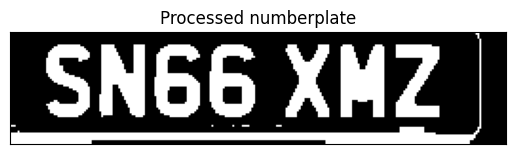

In [9]:
# Apply the preprocessing pipeline and find contours of characters
processed_numberplate = processing_pipeline.apply_pipeline(numberplate)
contours = processing_pipeline.find_sorted_contours(processed_numberplate)

plt.imshow(processed_numberplate, cmap='gray')
plt.title("Processed numberplate")
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
height, width = numberplate.shape[:2]
numberplate_string = plate_extractor.extract_chars(width, height, contours, numberplate)

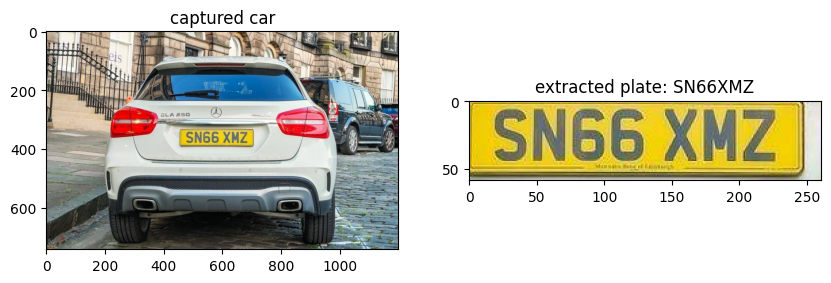

In [11]:
# Plot original and output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("captured car")

axes[1].imshow(numberplate)
axes[1].set_title(f"extracted plate: {numberplate_string}")

plt.show()